In [21]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from DelayControlSystem.delay_control import DelayControlSystem, PIDController


rcparamer = {
    "mathtext.fontset": "cm",
    "font.family": "serif",
    "font.size": 10,
    "figure.figsize": (5, 3.5),
    "axes.grid": True,
    "grid.linestyle": ":",
}

plt.rcParams.update(rcparamer)

The Plant

$$G(s) = \frac{K e^{-\theta s}}{(\tau_1 s + 1)(\tau_2 s + 1)}$$

In [22]:
K = 1
tau_1 = 10
tau_2 = 5
theta = 1
s = ctrl.TransferFunction.s
G = K / ((tau_1 * s + 1) * (tau_2 * s + 1))
Plant = DelayControlSystem(G, theta, dt=0.01)

In [23]:
# % add a method for IMC-PID tuning in the PIDController class
from types import MethodType


def IMC_tune(self, lambda_c, K, tau_1, tau_2, theta):
    K_c = (tau_1 + tau_2) / (K * (lambda_c + theta))
    tau_i = tau_1 + tau_2
    tau_d = (tau_1 * tau_2) / (tau_1 + tau_2)
    self.Kp = K_c
    self.Ki = K_c / tau_i
    self.Kd = K_c * tau_d


pid = PIDController(Kp=1, Ki=0.0, Kd=0.0, dt=0.01)
pid.IMC2_tune = MethodType(IMC_tune, pid)  # add method to instance
pid.IMC2_tune(lambda_c=1, K=K, tau_1=tau_1, tau_2=tau_2, theta=theta)

Define the DelayControlSystem and PIDController classes to simulate a control system with delay and PID control.

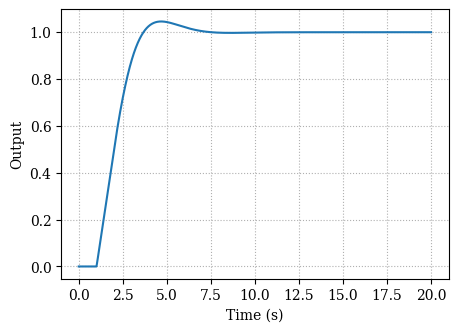

In [24]:
dt = 0.01
T = 20
time = np.linspace(0, T, int(T / dt))
Plant.reset()
pid.reset()
for j, _ in enumerate(time):
    setpoint = 1.0  # Desired setpoint
    measurement = Plant.y[-1] if Plant.y else 0.0
    error = setpoint - measurement
    u = pid.compute(setpoint, measurement)
    Plant.step(u)

plt.plot(Plant.t, Plant.y, label="Output")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.show()